In [22]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
# Step 2: Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [24]:
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [25]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text

soup2 = BeautifulSoup(html_data_2, 'html.parser')

gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup2.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})])

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

,Date,Revenue
0,2006-01-31,1667
0,2005-10-31,534
0,2005-07-31,416
0,2005-04-30,475
0,2005-01-31,709


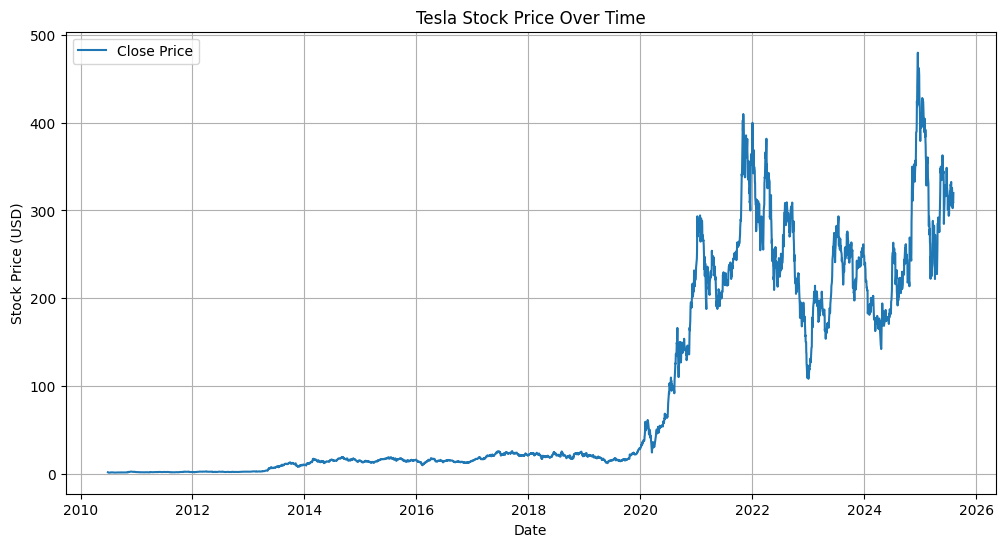

In [27]:
import matplotlib.pyplot as plt

# Define the graphing function
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Tesla stock data
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price Over Time")

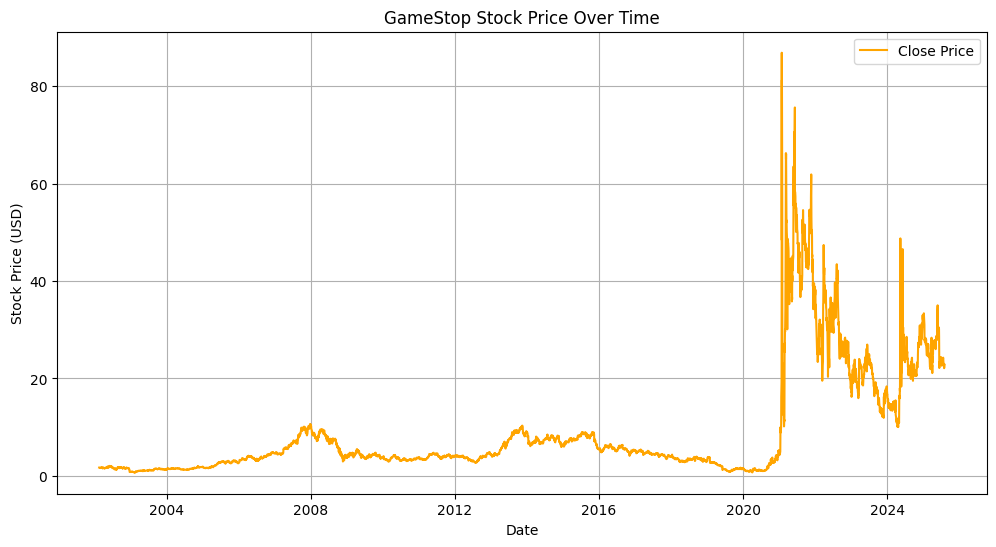

In [29]:
# Use the same make_graph function from before
def make_graph(stock_data, title):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price", color='orange')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot GameStop stock data
make_graph(gme_data, gme_revenue, "GameStop Stock Price Over Time")
